In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
import datetime

In [28]:
#import the data
data = pd.read_csv(file_path, header=0)

yfinance.Ticker object <META>

In [1]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=730)
tomorrow = end_date + datetime.timedelta(days=1)
prices = data["Close"]
prices.index = data["Date"]
prices.index = pd.to_datetime(prices.index)

# Remove timezone information from the index
prices.index = prices.index.tz_localize(None)

NameError: name 'datetime' is not defined

In [ ]:
#calculate returns
returns = prices.pct_change().dropna()
returns

Date
2021-12-03 00:00:00-05:00   -0.011437
2021-12-06 00:00:00-05:00    0.035947
2021-12-07 00:00:00-05:00    0.015541
2021-12-08 00:00:00-05:00    0.024008
2021-12-09 00:00:00-05:00   -0.002239
                               ...   
2023-11-27 00:00:00-05:00   -0.010437
2023-11-28 00:00:00-05:00    0.012817
2023-11-29 00:00:00-05:00   -0.020030
2023-11-30 00:00:00-05:00   -0.015202
2023-12-01 00:00:00-05:00   -0.007122
Name: Close, Length: 502, dtype: float64

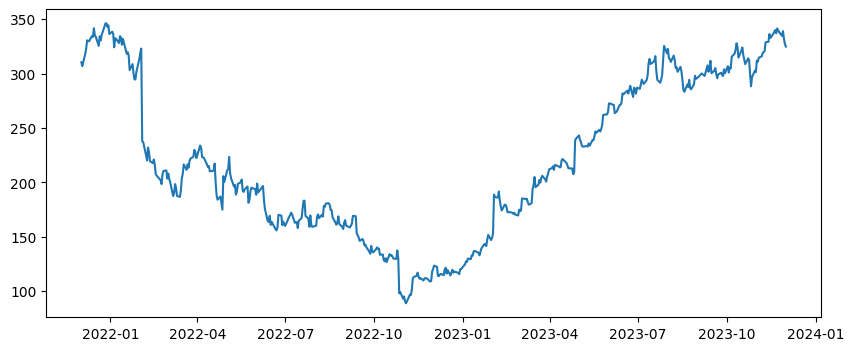

In [ ]:
#plot stock prices
plt.figure(figsize=(10,4))
plt.plot(prices)

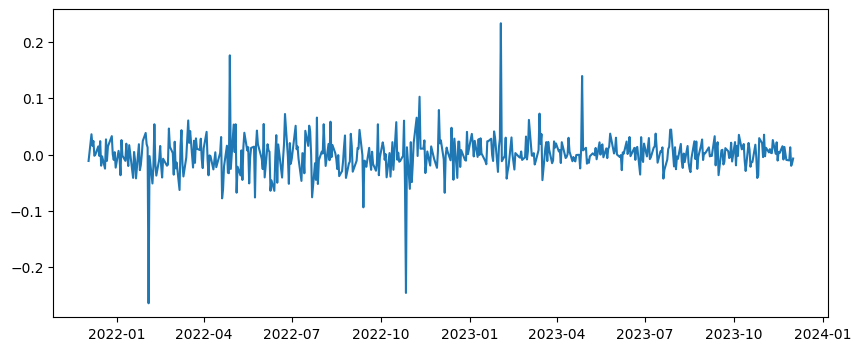

In [ ]:
#plot returns
plt.figure(figsize=(10,4))
plt.plot(returns)

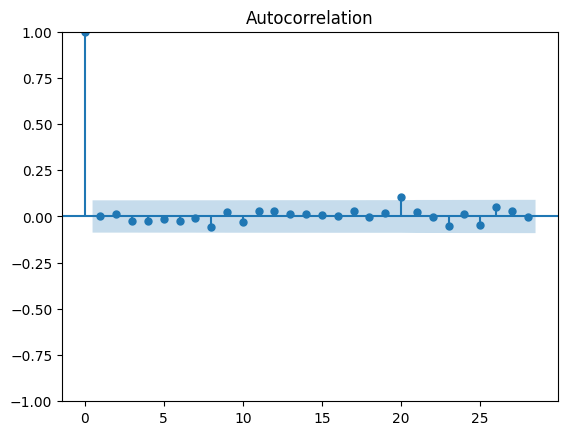

In [ ]:
#plot acf (MA) and pacf (AR)
plot_acf(returns)
plt.show()

#Take points that are outside the band as params (should have significant difference)

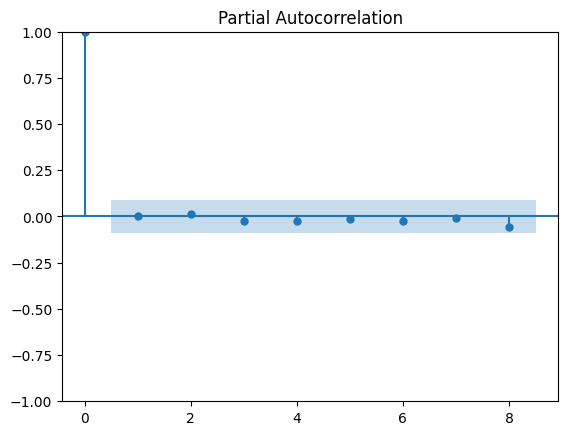

In [ ]:
plot_pacf(returns, method='ywm', lags=8)
plt.show()

In [ ]:
#building the model for ARIMA
model = ARIMA(prices, order=(7,0,6)) #Find best arima param for p,d,q
fitted = model.fit()
print(fitted.summary())

c:\Users\racoo\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\racoo\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\racoo\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  503
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -1697.801
Date:                Sat, 02 Dec 2023   AIC                           3425.603
Time:                        23:46:12   BIC                           3488.912
Sample:                             0   HQIC                          3450.439
                                - 503                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        220.8812   3586.687      0.062      0.951   -6808.896    7250.658
ar.L1          1.0696      0.385      2.779      0.005       0.315       1.824
ar.L2         -0.0748      0.552     -0.135      0.8

c:\Users\racoo\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import pandas_market_calendars as mcal
from datetime import datetime

market = mcal.get_calendar('XNYS') # For the New York Stock Exchange (NYSE)
today = datetime.now()

trading_days = []
current_date = today

while len(trading_days) < int(duration):
    schedule = market.schedule(start_date=current_date, end_date=current_date + pd.DateOffset(days=int(duration))) 
    trading_days.extend(schedule.index.strftime('%Y-%m-%d'))
    current_date += pd.DateOffset(days=int(duration))

trading_days = trading_days[:int(duration)]

print(trading_days)


['2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07', '2023-12-08', '2023-12-11', '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29']


In [ ]:
#prediction the next day price
next_day_price = fitted.forecast (int(duration), alpha=0.05)
next_day_price_df = next_day_price.to_frame(name='predicted_mean')
next_day_price_df['Date'] = pd.to_datetime(trading_days)
print(next_day_price_df)

     predicted_mean       Date
503      325.079569 2023-12-04
504      325.401390 2023-12-05
505      325.745835 2023-12-06
506      325.668748 2023-12-07
507      325.024607 2023-12-08
508      324.673920 2023-12-11
509      324.368493 2023-12-12
510      324.181999 2023-12-13
511      324.033189 2023-12-14
512      324.145336 2023-12-15
513      324.752974 2023-12-18
514      325.115029 2023-12-19
515      325.380474 2023-12-20
516      325.415208 2023-12-21
517      325.351048 2023-12-22
518      325.152945 2023-12-22
519      324.559586 2023-12-26
520      324.205947 2023-12-27
521      323.979430 2023-12-28
522      324.037011 2023-12-29


c:\Users\racoo\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\racoo\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\racoo\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


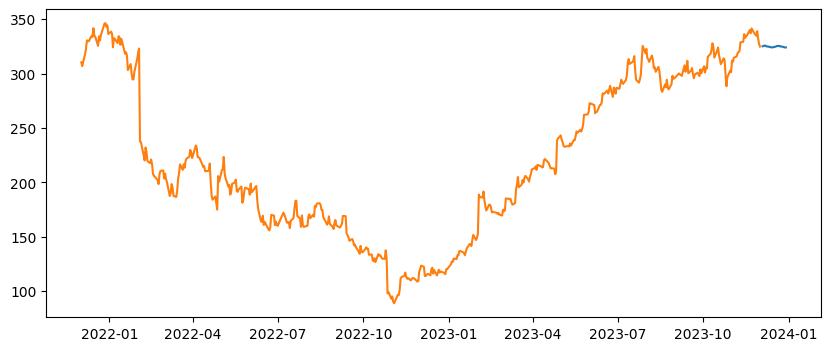

In [ ]:
#plot stock prices
plt.figure(figsize=(10,4))
plt.plot(next_day_price_df['Date'], next_day_price_df['predicted_mean'])
plt.plot(prices, label='Prices')

In [ ]:
with open('data_file.txt', 'w') as file:
    file.write(','.join(map(str, next_day_price_df['predicted_mean'])))

Date
2021-12-02 00:00:00-05:00    310.390015
2021-12-03 00:00:00-05:00    306.839996
2021-12-06 00:00:00-05:00    317.869995
2021-12-07 00:00:00-05:00    322.809998
2021-12-08 00:00:00-05:00    330.559998
                                ...    
2023-11-27 00:00:00-05:00    334.700012
2023-11-28 00:00:00-05:00    338.989990
2023-11-29 00:00:00-05:00    332.200012
2023-11-30 00:00:00-05:00    327.149994
2023-12-01 00:00:00-05:00    324.820007
Name: Close, Length: 503, dtype: float64